# Description 

This notebook can be used to display in python the colorscale produced by VGStudio for example

The input file looks like this

```
; Color look up table

0.001961 0.500000 0.500000 0.500000
0.550980 0.500000 255.500000 255.500000
0.625490 156.500000 0.500000 8.500000
0.782353 255.500000 255.500000 0.500000
0.994118 255.500000 255.500000 0.500000
0.998039 255.500000 255.500000 0.500000
```

where the first column is the b1, g1 and r1 array here (position from 0 to 1 where the color occured)

Attention: Make sure the new one starts at 0 and end at 1 (add the 0,0,0 and 255.5, 255.5, 255.5)

The last 3 columns are the R, G and B coefficient from 0->255.5


# Python Imports

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Conversion from 'lut' file -> matplotlib colorscale 

In [65]:
# lut color look up table

lut = np.array([[0, 0, 0],
        [0.500000, 0.500000, 0.5],
        [0.500000, 255.500000, 255.5],
        [156.500000, 0.500000, 8.5],
        [255.500000, 255.500000, 0.5],
        [255.500000, 255.500000, 0.5],
        [255.500000, 255.500000, 0.5],
        [255.5, 255.5, 255.5]])


In [66]:
LinL = lut/256

In [68]:
b3 = LinL[:,2] # value of blue at sample n
b2 = LinL[:,2] # value of blue at sample n
b1 = [0, 0.0019, 0.55, 0.62, 0.78, 0.994, 0.998, 1]

# Setting up columns for tuples
g3 = LinL[:,1]
g2 = LinL[:,1]
g1 = b1

r3 = LinL[:,0]
r2 = LinL[:,0]
r1 = b1

# Creating tuples
R = zip(r1,r2,r3)
G = zip(g1,g2,g3)
B = zip(b1,b2,b3)

# Transposing
RGB = zip(R,G,B)
rgb = zip(*RGB)

# Creating dictionary
k = ['red', 'green', 'blue']
LinearL = dict(zip(k,rgb))

In [69]:
print(LinearL)

{'green': ((0, 0.0, 0.0), (0.0019, 0.001953125, 0.001953125), (0.55, 0.998046875, 0.998046875), (0.62, 0.001953125, 0.001953125), (0.78, 0.998046875, 0.998046875), (0.994, 0.998046875, 0.998046875), (0.998, 0.998046875, 0.998046875), (1, 0.998046875, 0.998046875)), 'red': ((0, 0.0, 0.0), (0.0019, 0.001953125, 0.001953125), (0.55, 0.001953125, 0.001953125), (0.62, 0.611328125, 0.611328125), (0.78, 0.998046875, 0.998046875), (0.994, 0.998046875, 0.998046875), (0.998, 0.998046875, 0.998046875), (1, 0.998046875, 0.998046875)), 'blue': ((0, 0.0, 0.0), (0.0019, 0.001953125, 0.001953125), (0.55, 0.998046875, 0.998046875), (0.62, 0.033203125, 0.033203125), (0.78, 0.001953125, 0.001953125), (0.994, 0.001953125, 0.001953125), (0.998, 0.001953125, 0.001953125), (1, 0.998046875, 0.998046875))}


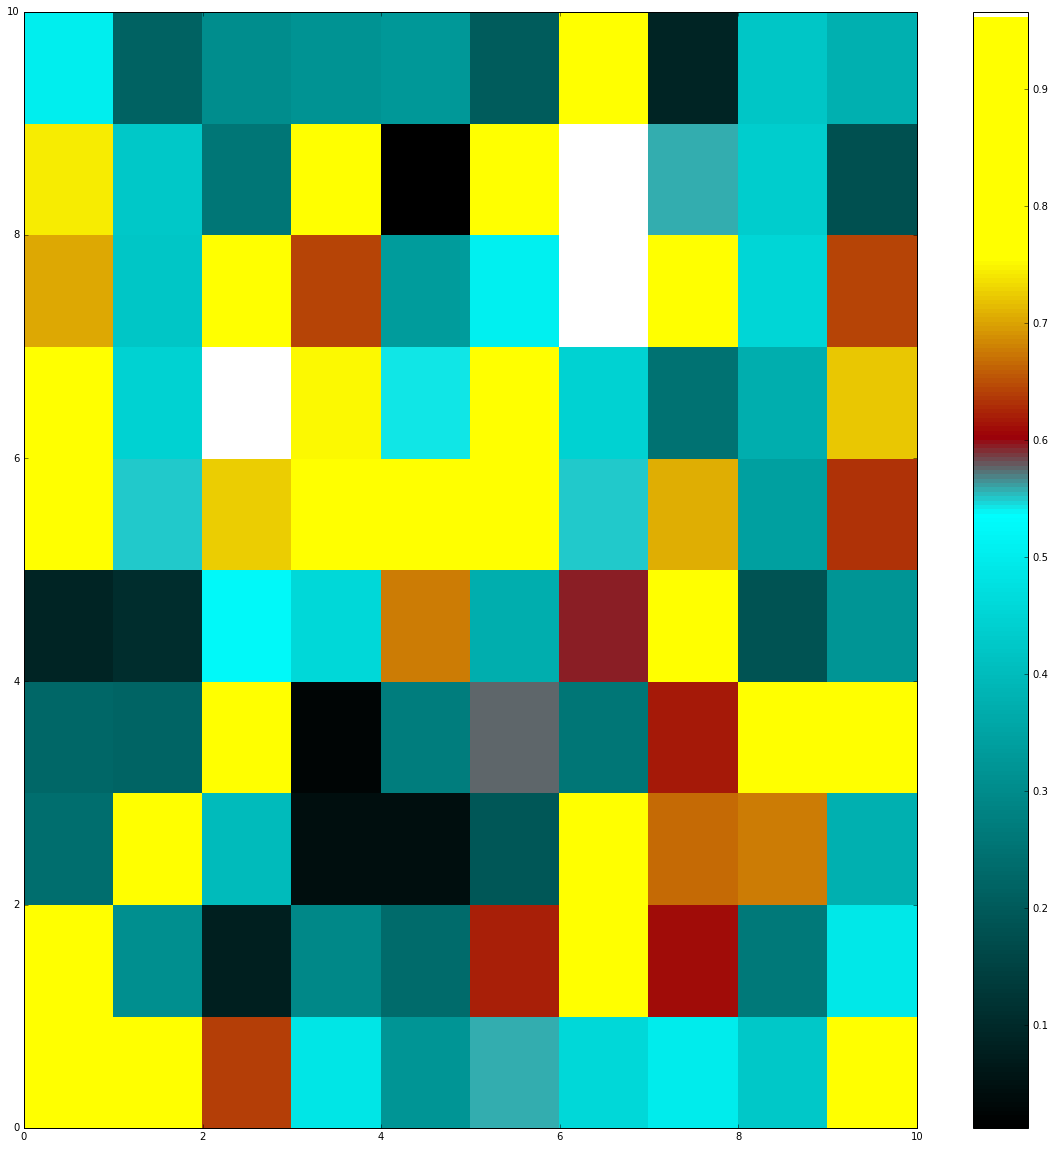

In [70]:
my_cmap = matplotlib.colors.LinearSegmentedColormap('matteo', LinearL)

plt.figure(figsize=(20,20))
plt.pcolor(rand(10,10),cmap=my_cmap)
plt.colorbar()
plt.show()